In [21]:
# install any additional packages
%pip install pycountry
%pip install geopandas
%pip install mapclassify

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached mapclassify-2.6.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
Using cached mapclassify-2.6.1-py3-none-any.whl (38 kB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.3.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pycountry 
import geopandas
from geopandas import GeoDataFrame
import seaborn as sns
import plotly.express as px

# styling 
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [24]:
original_data = pd.read_csv('../dataset/layoffs_data.csv')
# lowering column names to avoid typo errors
original_data.columns = original_data.columns.str.lower() 
# display first 2 rows
original_data.head(2).style.background_gradient(axis=None) 

,company,location_hq,industry,percentage,date,source,funds_raised,stage,date_added,country,laid_off_count,list_of_employees_laid_off
0,Fisker,Los Angeles,Transportation,0.150000,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layoffs-cash-going-concern-dealerships/,1700.000000,Post-IPO,2024-02-29 23:35:20,United States,nan,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.050000,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-company-to-cut-5percent-of-workforce-or-about-670-employees.html,2.000000,Post-IPO,2024-02-29 00:45:00,United States,670.000000,Unknown


In [25]:
data = original_data.copy()
data.head().style.background_gradient(axis=None) 

,company,location_hq,industry,percentage,date,source,funds_raised,stage,date_added,country,laid_off_count,list_of_employees_laid_off
0,Fisker,Los Angeles,Transportation,0.150000,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layoffs-cash-going-concern-dealerships/,1700.000000,Post-IPO,2024-02-29 23:35:20,United States,nan,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.050000,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-company-to-cut-5percent-of-workforce-or-about-670-employees.html,2.000000,Post-IPO,2024-02-29 00:45:00,United States,670.000000,Unknown
2,Vacasa,Portland,Travel,0.050000,2024-02-28,https://www.oregonlive.com/business/2024/02/portland-based-vacasa-will-lay-off-another-320-new-year-is-off-to-a-difficult-start.html,834.000000,Post-IPO,2024-02-29 17:22:37,United States,320.000000,Unknown
3,Treasury Prime,SF Bay Area,Finance,0.400000,2024-02-28,https://www.bankingdive.com/news/treasury-prime-lay-off-40-50-employees-marketing-liaison-direct-fintech-partner-chris-dean/708770/,71.000000,Series C,2024-02-29 00:48:03,United States,40.000000,Unknown
4,Motional,Boston,Transportation,0.050000,2024-02-28,https://techcrunch.com/2024/02/28/hyundai-backed-autonomous-company-motional-cuts-5-of-workforce/,nan,Unknown,2024-02-28 18:50:58,United States,nan,Unknown


## <font color = "Blue"> Pre Processing </font>

#### <font color = "Green"> Data Cleaning </font>

##### <font color = "Blue"> Datatype conversions </font>

In [26]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data['date_added'] = pd.to_datetime(data['date_added'], infer_datetime_format=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   company                     3485 non-null   object        
 1   location_hq                 3485 non-null   object        
 2   industry                    3485 non-null   object        
 3   percentage                  2245 non-null   float64       
 4   date                        3485 non-null   datetime64[ns]
 5   source                      3485 non-null   object        
 6   funds_raised                3115 non-null   float64       
 7   stage                       3485 non-null   object        
 8   date_added                  3485 non-null   datetime64[ns]
 9   country                     3485 non-null   object        
 10  laid_off_count              2290 non-null   float64       
 11  list_of_employees_laid_off  3484 non-null   object      

C:\Users\670310840\AppData\Local\Temp\ipykernel_16500\2529875511.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
C:\Users\670310840\AppData\Local\Temp\ipykernel_16500\2529875511.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date_added'] = pd.to_datetime(data['date_added'], infer_datetime_format=True)


##### <font color = "Blue"> Missing value treatment </font>

In [27]:
print("Total records in dataframe -", len(data))
print("Nulls stats - ")
data.isnull().sum()

Total records in dataframe - 3485
Nulls stats - 


company                          0
location_hq                      0
industry                         0
percentage                    1240
date                             0
source                           0
funds_raised                   370
stage                            0
date_added                       0
country                          0
laid_off_count                1195
list_of_employees_laid_off       1
dtype: int64

In [28]:
# Replace NaN with O -
data['laid_off_count'] = data['laid_off_count'].replace(np.NaN, 0)
data['percentage'] = data['percentage'].replace(np.NaN, 0)
data['funds_raised'] = data['funds_raised'].replace(np.NaN, 0)

# Replace missing date with date added
data['date'] = data['date'].fillna(data['date_added'])

# check for nulls - 
print("Nulls stats - ")
data.isnull().sum()

Nulls stats - 


company                       0
location_hq                   0
industry                      0
percentage                    0
date                          0
source                        0
funds_raised                  0
stage                         0
date_added                    0
country                       0
laid_off_count                0
list_of_employees_laid_off    1
dtype: int64

##### <font color = "Blue"> Remove unwanted columns </font>

In [29]:
columns_to_be_dropped = ['source', 'date_added', 'list_of_employees_laid_off']
data = data.drop(columns_to_be_dropped, axis=True)
data.columns.values

array(['company', 'location_hq', 'industry', 'percentage', 'date',
       'funds_raised', 'stage', 'country', 'laid_off_count'], dtype=object)

#### <font color = "Green"> Build additional columns for EDA </font>

In [30]:
data['month'] = data['date'].dt.strftime('%b')
data['year'] = data['date'].dt.year
data['month_year'] = data['date'].dt.to_period('M')
data['quarter'] = pd.PeriodIndex(pd.to_datetime(data.date), freq='Q')
data.head(2)

,company,location_hq,industry,percentage,date,funds_raised,stage,country,laid_off_count,month,year,month_year,quarter
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,1700.0,Post-IPO,United States,0.0,Feb,2024,2024-02,2024Q1
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,Feb,2024,2024-02,2024Q1


##### <font color = "Blue"> Logic for world map </font>

In [31]:
def get_country_code(column):
    country_code=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            country_code.append(code)
        except:
            country_code.append('None')
    return country_code

In [32]:
# create a geo df 
geo_df = data.groupby(['country'], as_index=False)["laid_off_count"].sum()

# create a column for country_code 
geo_df['country_code'] = get_country_code(geo_df.country)
geo_df.head(2)

,country,laid_off_count,country_code
0,Argentina,323.0,ARG
1,Australia,3623.0,AUS


In [33]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'country_code', 'gdp_md_est', 'geometry']
world.head(2)

C:\Users\670310840\AppData\Local\Temp\ipykernel_16500\2640713853.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,country_code,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [34]:
geo_df = pd.merge(geo_df, world, how ="left", on='country_code')
geo_df.head(2)
columns_to_be_dropped = ['pop_est', 'gdp_md_est', 'name']
geo_df = geo_df.drop(columns_to_be_dropped, axis=True)
print(geo_df.columns.values)
print(geo_df.shape)

['country' 'laid_off_count' 'country_code' 'continent' 'geometry']
(63, 5)


In [35]:
# Error :- AttributeError: 'Line2D' object has no property 'column'
# Solution :- Converting the final dataframe into a geodataframe

geo_df = GeoDataFrame(geo_df)

geo_df.head(3)

,country,laid_off_count,country_code,continent,geometry
0,Argentina,323.0,ARG,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
1,Australia,3623.0,AUS,Oceania,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
2,Austria,740.0,AUT,Europe,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."


## <font color = "Blue"> Exploratory data analysis (EDA)  </font>

##### <font color = "Green">  Statistics related to employee layoffs w.r.t geographical location</font>

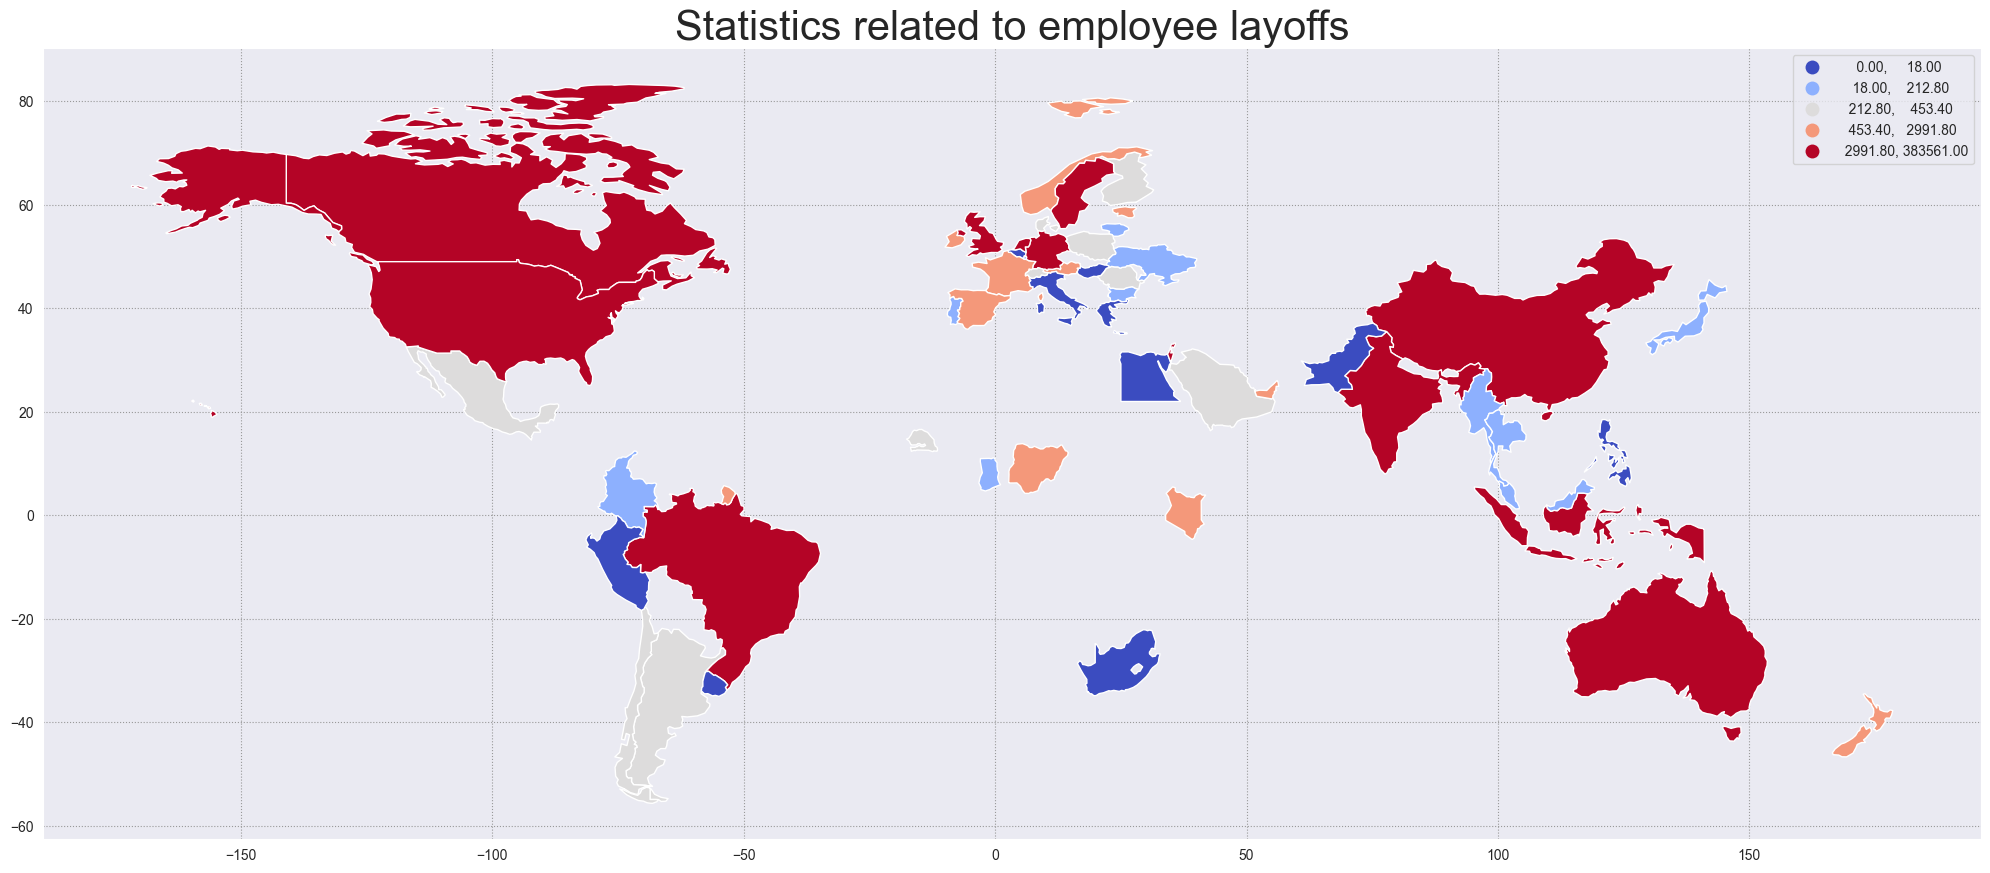

In [36]:
geo_df.plot(column='laid_off_count', 
                scheme="quantiles",
                figsize=(25, 20),
                legend=True,
                cmap='coolwarm' # coolwarm, inferno, hsv, Oranges_r, Blues
           )

# plt.rcParams["figure.autolayout"] = True

""" 
Ps :- I tried to increase size of legends and seems it's not working. 
May be I am missing something.
"""

# plt.legend(['blue', 'orange', 'green', 'red', 'grey'],
#            prop = {'size' : 100},
#            loc = 'upper left', shadow = True,
#            facecolor = 'yellow')

plt.title('Statistics related to employee layoffs',fontsize=30)

plt.show()

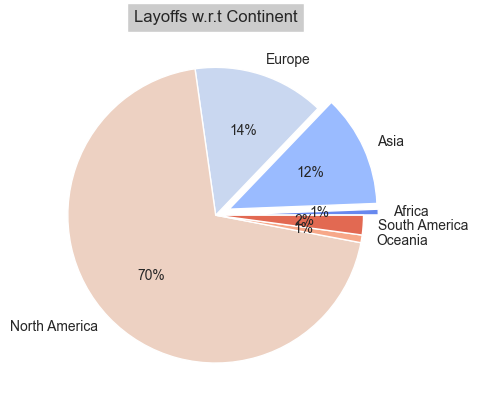

In [37]:
temp_df = geo_df.groupby(['continent'], as_index=False)["laid_off_count"].sum()

# declaring exploding pie
explode = [0.1, 0.1, 0, 0, 0, 0]

palette_color = sns.color_palette('coolwarm')

plt.pie(temp_df['laid_off_count'], 
        labels = temp_df['continent'], 
        colors = palette_color, 
        explode=explode,
        autopct='%.0f%%')

plt.title("Layoffs w.r.t Continent", 
          bbox={'facecolor':'0.8', 'pad':5})

plt.show()

##### <font color = "Green">  Statistics related to employee layoffs w.r.t timeline(dates) </font>

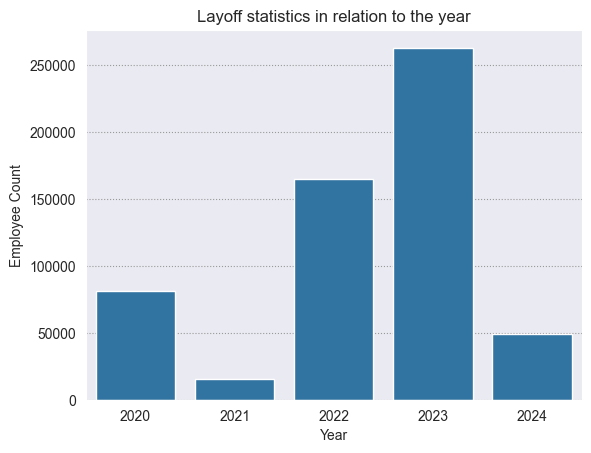

In [38]:
ax = sns.barplot(x="year",
            y="laid_off_count",
            errorbar=('ci', 0),
            data=data,
            estimator=sum
           )

ax.set(xlabel='Year', ylabel='Employee Count', 
       title= "Layoff statistics in relation to the year")
plt.show()


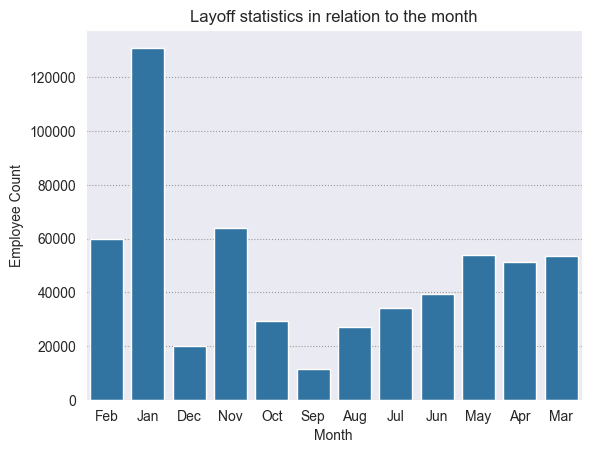

In [39]:
ax = sns.barplot(x="month",
            y="laid_off_count",
            errorbar=('ci', 0),
            data=data,
            estimator=sum
           )

ax.set(xlabel='Month', ylabel='Employee Count', 
       title= "Layoff statistics in relation to the month")
plt.show()

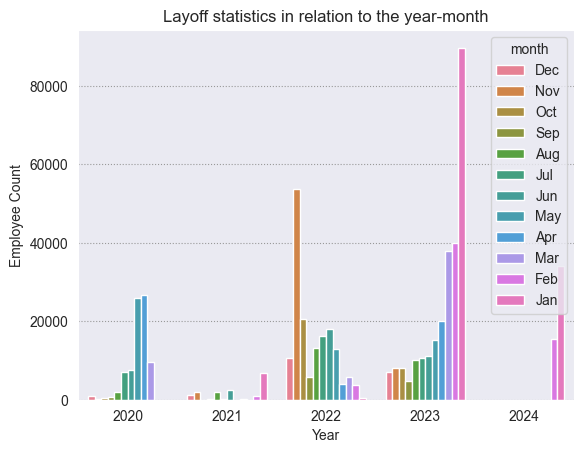

In [40]:
ax = sns.barplot(x="year",
            y="laid_off_count",
            hue="month",     
            errorbar=('ci', 0),
            data= data,
            estimator=sum,            
            #log=True,
           )

ax.set(xlabel='Year', ylabel='Employee Count', 
       title= "Layoff statistics in relation to the year-month")
plt.show()

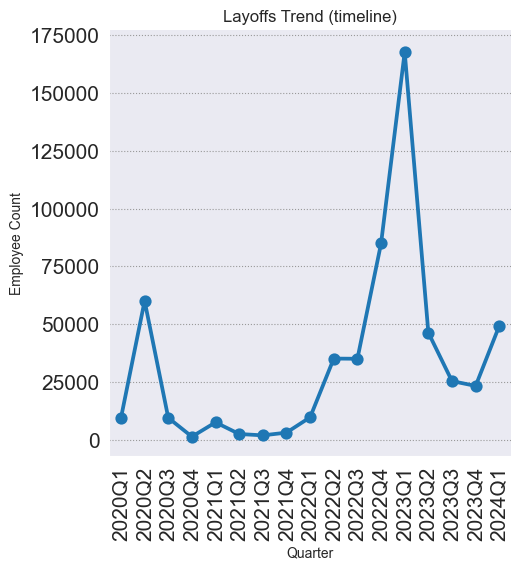

In [41]:

ax = sns.catplot(x="quarter", 
                 y="laid_off_count", 
                 errorbar=('ci', 0),
                 #data=data,
                 data=data.sort_values(by=['quarter'], ascending=True),
                 estimator=sum,
                 kind='point')

ax.set(xlabel='Quarter', ylabel='Employee Count', 
       title= "Layoffs Trend (timeline)")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.show()

##### <font color = "Green"> Statistics related to employee layoffs (For Top N  records) </font>

In [42]:
""" PS :- you can configure this parameter to set the number of records you want 
to view. No need to change in other places.
"""
top_n = 10

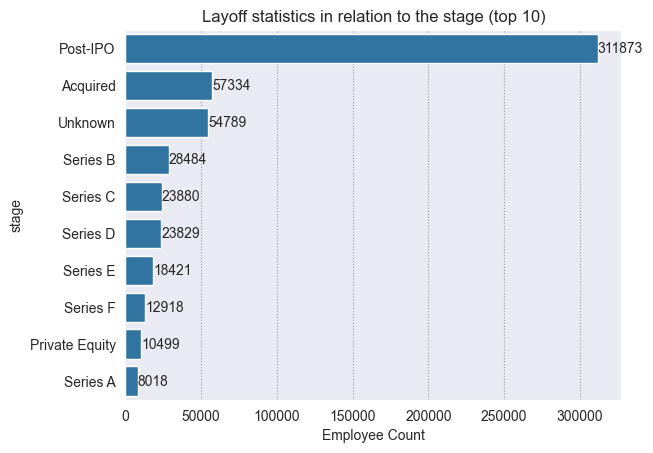

In [43]:
temp_df = data.groupby(['stage'], as_index=False)["laid_off_count"].sum()

temp_df = temp_df.sort_values(by=['laid_off_count'], ascending=False)

ax = sns.barplot(y="stage",
            x="laid_off_count",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
            dodge=False
           )
for container in ax.containers:
    ax.bar_label(container,padding=0)
    
ax.set(xlabel='Employee Count', ylabel='stage', 
       title= "Layoff statistics in relation to the stage (top {})".format(top_n))
plt.show()

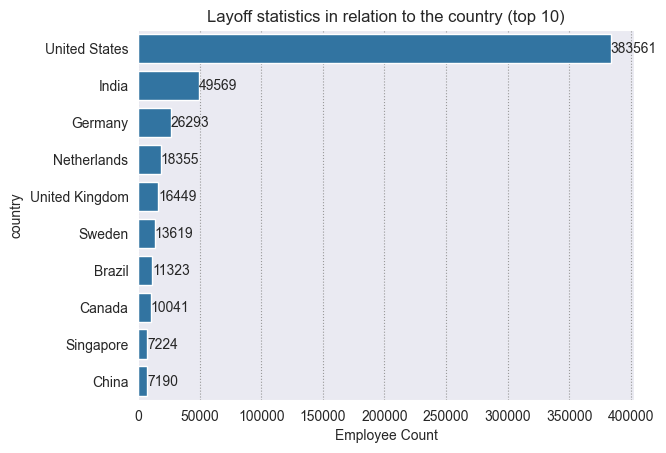

In [44]:
temp_df = data.groupby(['country'], as_index=False)["laid_off_count"].sum()

temp_df = temp_df.sort_values(by=['laid_off_count'], ascending=False)

ax = sns.barplot(y="country",
            x="laid_off_count",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
           )

for container in ax.containers:
    ax.bar_label(container,padding=0)
    
ax.set(ylabel='country', xlabel='Employee Count', 
       title= "Layoff statistics in relation to the country (top {})".format(top_n))
plt.show()

Index(['company', 'location_hq', 'industry', 'percentage', 'date',
       'funds_raised', 'stage', 'country', 'laid_off_count', 'month', 'year',
       'month_year', 'quarter'],
      dtype='object')


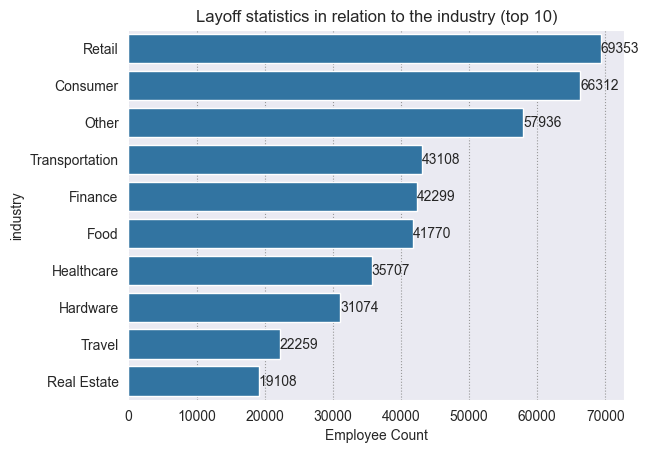

In [50]:
print(data.columns)
temp_df = data.drop(columns=["date",'month', 'year', 'month_year', 'quarter']).groupby(['industry'], as_index=False).sum()

temp_df = temp_df.sort_values(by=['laid_off_count'], ascending=False)

ax = sns.barplot(y="industry",
            x="laid_off_count",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
           )

for container in ax.containers:
    ax.bar_label(container,padding=0)
    
ax.set(ylabel='industry', xlabel='Employee Count', 
       title= "Layoff statistics in relation to the industry (top {})".format(top_n))
plt.show()

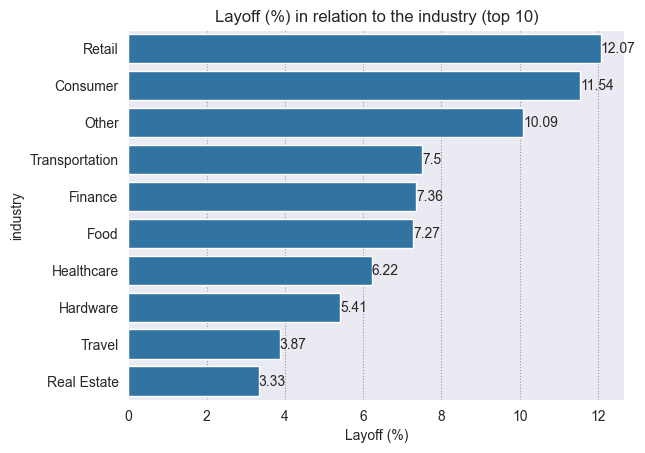

In [51]:
#temp_df.laid_off_count.sum()
temp_df["layoff_percent"] = round(temp_df["laid_off_count"] / temp_df.laid_off_count.sum() * 100,2)

ax = sns.barplot(y="industry",
            x="layoff_percent",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
           )

for container in ax.containers:
    ax.bar_label(container,padding=0)
    
ax.set(ylabel='industry', xlabel='Layoff (%)', 
       title= "Layoff (%) in relation to the industry (top {})".format(top_n))
plt.show()



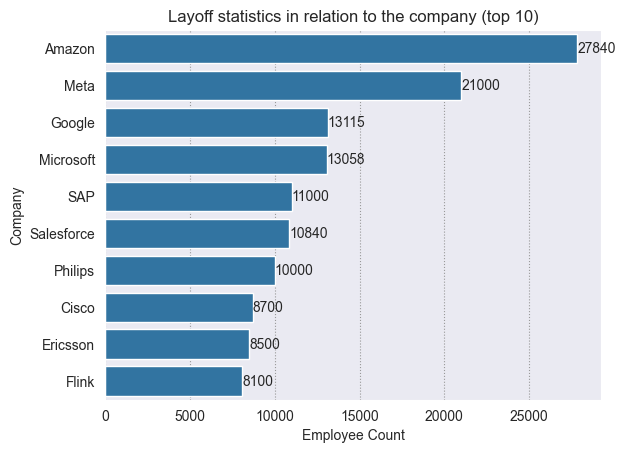

In [52]:
temp_df = data.groupby(['company'], as_index=False)["laid_off_count"].sum()

temp_df = temp_df.sort_values(by=['laid_off_count'], ascending=False)

ax = sns.barplot(y="company",
            x="laid_off_count",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
            orient='h'     
           )

for container in ax.containers:
    ax.bar_label(container,padding=0)
    
    
ax.set(xlabel='Employee Count', ylabel='Company', 
       title= "Layoff statistics in relation to the company (top {})".format(top_n))
plt.show()

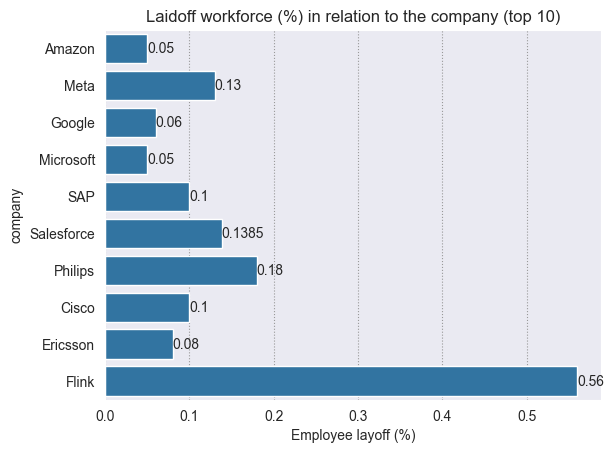

In [54]:
temp_df = data.drop(columns=["date",'month', 'year', 'month_year', 'quarter']).groupby(['company'], as_index=False).sum()

temp_df = temp_df.sort_values(by=['laid_off_count'], ascending=False)

ax = sns.barplot(y="company",
            x="percentage",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
            orient='h'             
           )

for container in ax.containers:
    ax.bar_label(container,padding=0)
    
    
ax.set(ylabel='company', xlabel='Employee layoff (%)', 
       title= "Laidoff workforce (%) in relation to the company (top {})".format(top_n))
plt.show()

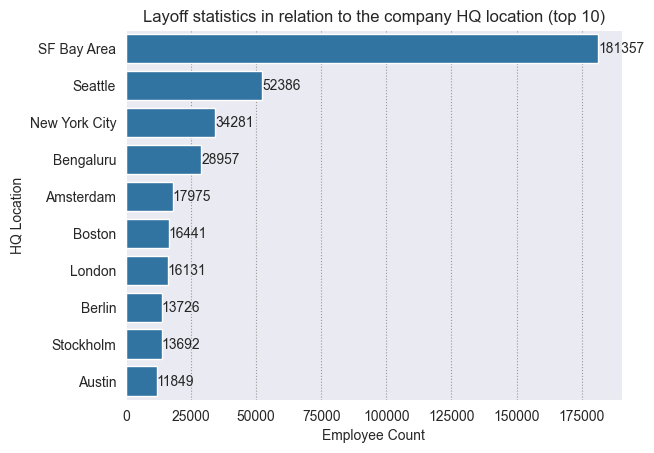

In [56]:
temp_df = data.drop(columns=["date",'month', 'year', 'month_year', 'quarter']).groupby(['location_hq'], as_index=False).sum()

temp_df = temp_df.sort_values(by=['laid_off_count'], ascending=False)

ax = sns.barplot(y="location_hq",
            x="laid_off_count",
            errorbar=('ci', 0),
            data= temp_df.head(top_n),
            estimator=sum,
            orient='h'             
           )

for container in ax.containers:
    ax.bar_label(container,padding=0)
    
    
ax.set(ylabel='HQ Location', xlabel='Employee Count', 
       title= "Layoff statistics in relation to the company HQ location (top {})".format(top_n))
plt.show()